In [1]:
!pip install scikit-learn
!pip install keras
!pip install tensorflow
!pip install opencv-python

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense , MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation ,Add,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
import tensorflow as tf
#from tensorflow.keras.losses import binary_crossentropy,mean_absolute_error


In [3]:
import os
os.listdir()

['.1.0.0.0',
 '.anaconda',
 '.android',
 '.cache',
 '.conda',
 '.config',
 '.continuum',
 '.dotnet',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.librarymanager',
 '.matplotlib',
 '.QtWebEngineProcess',
 '.spyder-py3',
 '.templateengine',
 'anaconda3',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'Gui1.ipynb',
 'install.log',
 'Links',
 'Local Settings',
 'Model.ipynb',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{02c252ce-e843-11ed-a799-e041c660edd7}.TM.blf',
 'NTUSER.DAT{02c252ce-e843-11ed-a799-e041c660edd7}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{02c252ce-e843-11ed-a799-e041c660edd7}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Personal',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'source',
 'Start Menu',
 'Templates',
 'Untitled.ipynb',
 'Videos']

In [4]:
os.chdir('C:\\Users\\PRAFULL\\desktop\\AgeandGender\\UTKFace')

In [5]:
os.getcwd()

'C:\\Users\\PRAFULL\\desktop\\AgeandGender\\UTKFace'

In [6]:
files = os.listdir()

In [7]:
ages=[]
genders=[]
images=[]
for file in files:
  age=int(file.split('_')[0])
  gender=int(file.split('_')[1])
  total = os.path.join(os.getcwd(), file)
  print(total)
  image=cv2.imread(total)

  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(48,48))
  images.append(image)

C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_0_0_20170112213500903.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_0_0_20170112215240346.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_1_0_20170110183726390.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_1_0_20170112213001988.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_1_0_20170112213303693.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_1_0_20170112215032192.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_1_0_20170117195420803.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_1_0_20170119212053665.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_1_2_20170105174847679.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_1_2_20170112213615815.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\100_1_2_20170112222336458.jpg.chip.jpg
C:\Users\PRAFULL\desktop\AgeandGender\UTKFace\101_0_0_20170112213

In [8]:
for file in files:
  age=int(file.split('_')[0])
  gender=int(file.split('_')[1])
    
  ages.append(age)
  genders.append(gender)

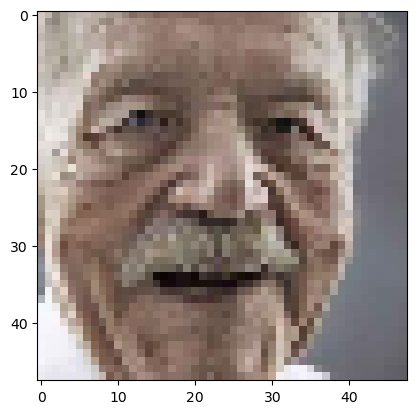

In [9]:
plt.imshow(images[0])

In [10]:
print(ages[0])


100


In [11]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)


In [12]:
np.save(os.path.join(os.getcwd(),'images.npy'),images_f)
np.save(os.path.join(os.getcwd(),'ages.npy'),ages_f)
np.save(os.path.join(os.getcwd(), 'genders.npy'), genders_f)

In [13]:
values , counts=np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


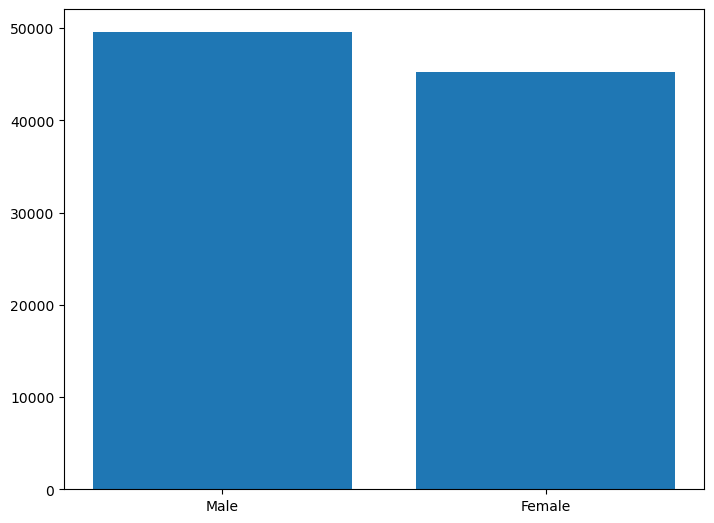

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[49564, 45268]
ax.bar(gender,values)
plt.show()

In [15]:
vlaues,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [16]:
val=values
cnt=counts


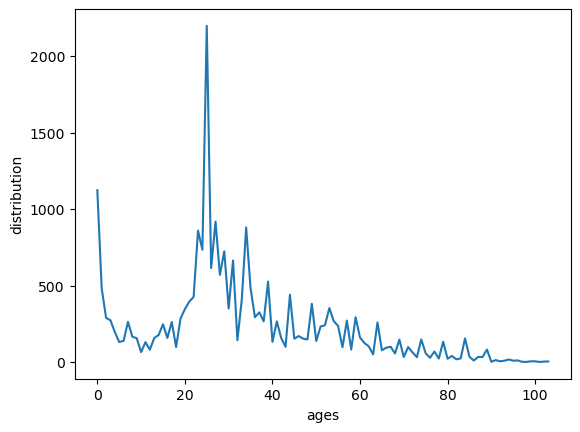

In [17]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [18]:
labels=[]
i=0
while i<len(ages):
  label=[]
  label.append(ages[i])
  label.append(genders[i])
  labels.append(label)
  i=i+1

print(labels)

[[100, 0], [100, 0], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [100, 1], [101, 0], [101, 1], [103, 0], [105, 0], [105, 1], [105, 1], [105, 1], [105, 1], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0], [10, 0],

In [19]:
images_f_2=images_f/255
images_f_2.shape


(23708, 48, 48, 3)

In [20]:
labels_f=np.array(labels)


In [21]:
x_train,x_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [22]:
y_train[0:5]

array([[ 3,  1],
       [78,  0],
       [ 8,  1],
       [36,  1],
       [35,  0]])

In [23]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [24]:
y_train_2[0][0:5]

array([1, 0, 1, 1, 0])

In [25]:
y_train_2[1][0:5]

array([ 3, 78,  8, 36, 35])

In [26]:
def Convolution(input_tensor, filters):
    regularizer = l2(0.001)  # Instantiate the regularizer
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=regularizer)(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x


In [27]:
def model(input_shape):
  inputs=Input((input_shape))
  conv_1=Convolution(inputs,32)
  maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
  conv_2=Convolution(maxp_1,64)
  maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
  conv_3=Convolution(maxp_2,128)
  maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
  conv_4=Convolution(maxp_3,256)
  maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
  flatten=Flatten()(maxp_4)
  dense_1=Dense(64,activation='relu')(flatten)
  dense_2=Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
  output_2=Dense(1,activation='relu',name='age_out')(drop_2)
  model=Model(inputs=[inputs],outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=[['accuracy'],['accuracy']])
  return model


In [28]:
Model =model((48,48,3))


In [29]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 32)        │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 48, 48, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 48, 48, 32)        │               0 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 32)        │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 24, 24, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 24, 24, 64)        │               0 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 64)        │               0 │ activation_1[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 12, 12, 128)       │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 12, 12, 128)       │               0 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 6, 6, 128)         │               0 │ activation_2[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 6, 6, 256)         │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 6, 6, 256)         │               0 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 6, 6, 256)         │               0 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [31]:
from tensorflow.keras.models import load_model, save_model

save_model(Model, os.path.join(os.getcwd(), "Age_sex_detection.keras"))

#save_model( "Age_sex_detection.keras")#model.save("AgeandGender.keras")

# Load the model
loaded_model = load_model("Age_sex_detection.keras")


C:\Users\PRAFULL\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [32]:
fle_s='Age_sex_detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [33]:
History=Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=25,callbacks=callback_list)

Epoch 1/25
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - age_out_accuracy: 0.0454 - loss: 18.9732 - sex_out_accuracy: 0.5426
Epoch 1: val_loss improved from inf to 17.99079, saving model to Age_sex_detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 121s 411ms/step - age_out_accuracy: 0.0454 - loss: 18.9664 - sex_out_accuracy: 0.5427 - val_age_out_accuracy: 0.0476 - val_loss: 17.9908 - val_sex_out_accuracy: 0.6725
Epoch 2/25
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - age_out_accuracy: 0.0468 - loss: 14.6239 - sex_out_accuracy: 0.6374
Epoch 2: val_loss improved from 17.99079 to 12.32755, saving model to Age_sex_detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 94s 337ms/step - age_out_accuracy: 0.0468 - loss: 14.6199 - sex_out_accuracy: 0.6376 - val_age_out_accuracy: 0.0471 - val_loss: 12.3275 - val_sex_out_accuracy: 0.7559
Epoch 3/25
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - age_out_accuracy: 0.0432 - loss: 11.4301 - sex_out_accuracy: 0.7422
Epoch 3: val_loss did not improve from 12.32755
278/

In [34]:
Model.evaluate(x_test,y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - age_out_accuracy: 0.0432 - loss: 8.3386 - sex_out_accuracy: 0.8897


[8.193296432495117, 0.047578874975442886, 0.8864518404006958]

In [35]:
pred=Model.predict(x_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step


In [36]:
pred[1]

array([[ 1.3916738],
       [37.76127  ],
       [35.12503  ],
       ...,
       [26.108316 ],
       [29.842787 ],
       [48.563797 ]], dtype=float32)

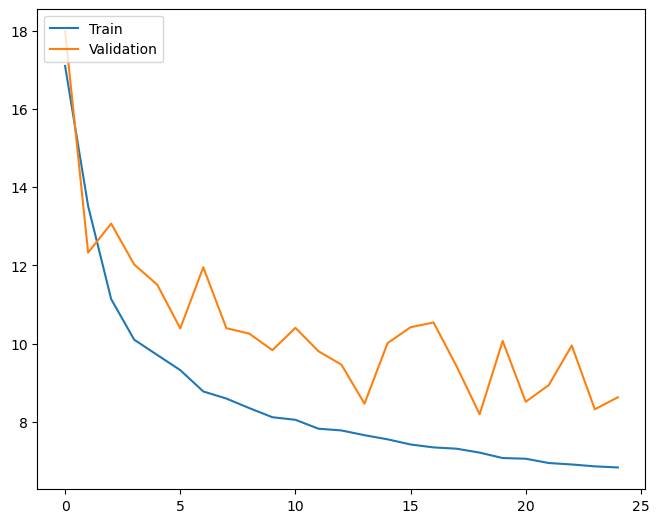

In [37]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title=('Epoch')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

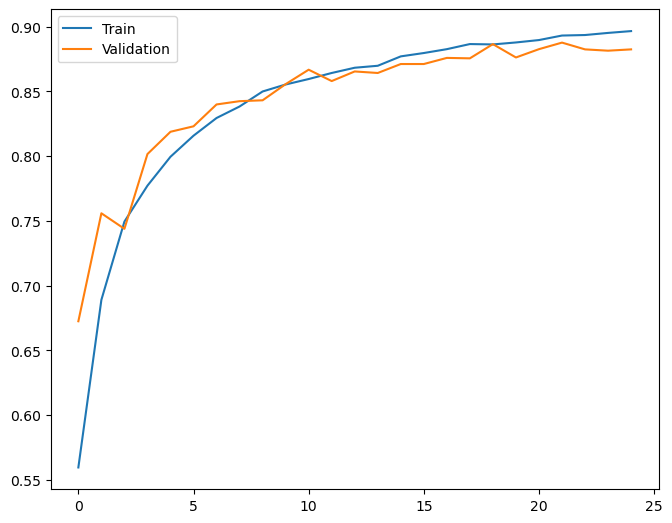

In [38]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title=('Model Accuarcy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

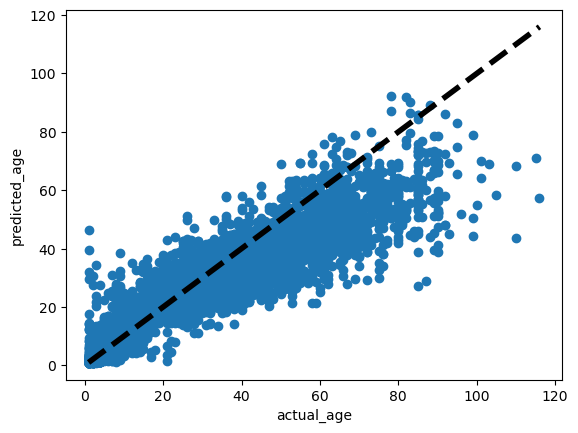

In [39]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('actual_age')
ax.set_ylabel('predicted_age')
plt.show()

In [40]:
i=0
pred_1=[]
while(i<len(pred[0])):
  pred_1.append(int(np.round(pred[0][i])))
  i=i+1

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
report=classification_report(y_test_2[0],pred_1)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3110
           1       0.88      0.89      0.88      2817

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [44]:
result=confusion_matrix(y_test_2[0],pred_1)

<Axes: >

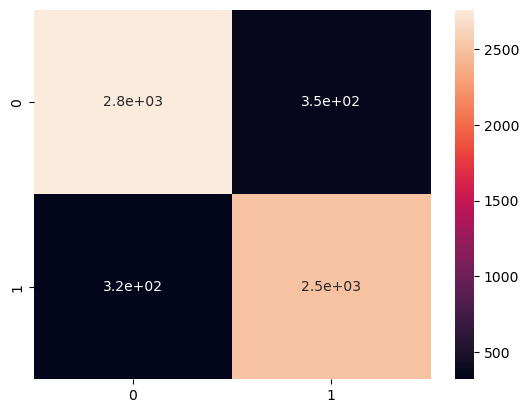

In [45]:
import seaborn as sns
sns.heatmap(result,annot=True)

In [46]:
def test_image(ind,images_f,images_f_2,Model):
  plt.imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("predicted age is " + str(age))
  print("predicted gender is " + sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
predicted age is 89
predicted gender is Female


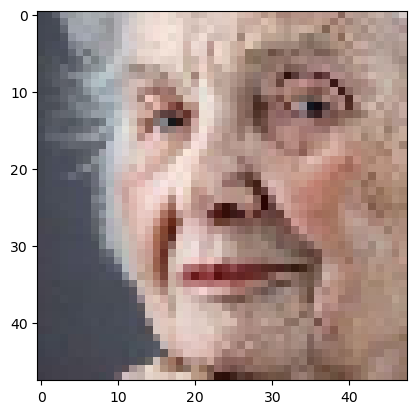

In [47]:
test_image(4,images_f,images_f_2 ,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
predicted age is 11
predicted gender is Male


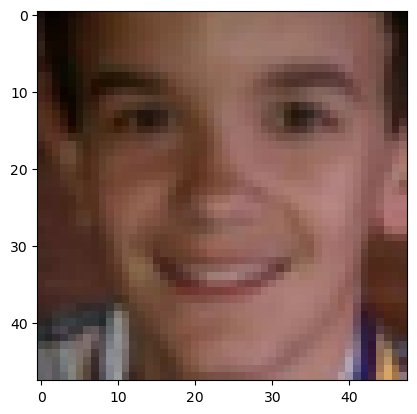

In [48]:
test_image(23,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
predicted age is 9
predicted gender is Female


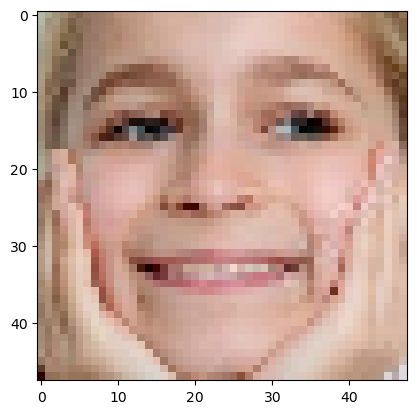

In [49]:
test_image(123,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
predicted age is 12
predicted gender is Female


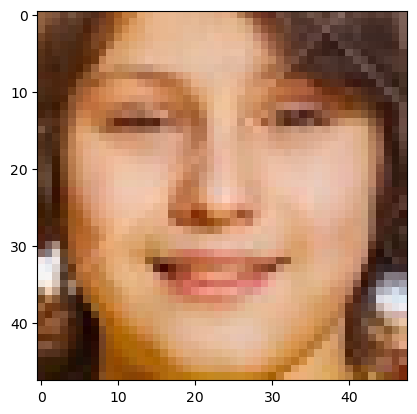

In [50]:
test_image(200,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
predicted age is 3
predicted gender is Male


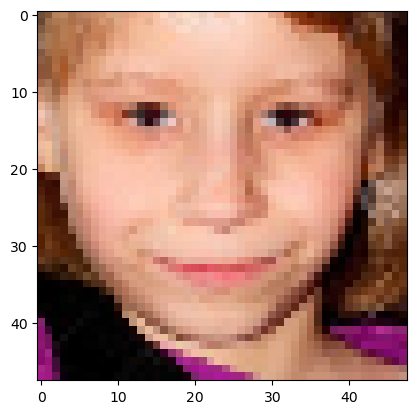

In [51]:
test_image(235,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
predicted age is 20
predicted gender is Female


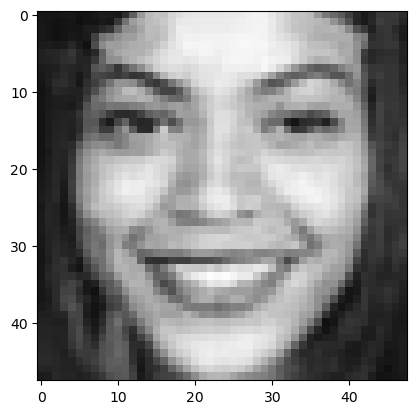

In [52]:
test_image(1000,images_f,images_f_2,Model)